In [1]:
# import all data libraries
import pandas as pd
import numpy as np

# import all plotting libraries
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
import seaborn as sns

# import all ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/var/folders/0h/njbgxkm91h75wxz5tx3bf5dr0000gn/T/ipykernel_22095/2133311183.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# load/read the csv file into a pandas DataFrame
expDataframe = pd.read_csv("experiment.csv")

In [3]:
# explore the first 10 entries of the csv file
expDataframe.head(10)

,CURRENT,VOLTAGE
0,-2.74,-10.0
1,-2.25,-9.0
2,-2.00,-8.0
3,-1.75,-7.0
4,-1.50,-6.0
5,-1.49,-5.0
6,-1.00,-4.0
7,-0.51,-3.0
8,-0.74,-2.0
9,-0.49,-1.0


In [4]:
# Accessing the VOLTAGE as an array/series
expDataframe.VOLTAGE

0    -10.0
1     -9.0
2     -8.0
3     -7.0
4     -6.0
5     -5.0
6     -4.0
7     -3.0
8     -2.0
9     -1.0
10     0.0
11     1.0
12     2.0
13     3.0
14     4.0
15     5.0
16     6.0
17     7.0
18     8.0
19     9.0
20    10.0
Name: VOLTAGE, dtype: float64

In [5]:
# Accessing the CURRENT as an array/series
expDataframe.CURRENT

0    -2.74
1    -2.25
2    -2.00
3    -1.75
4    -1.50
5    -1.49
6    -1.00
7    -0.51
8    -0.74
9    -0.49
10    0.00
11    0.49
12    0.50
13    0.99
14    0.76
15    1.01
16    1.74
17    1.75
18    2.00
19    2.49
20    2.50
Name: CURRENT, dtype: float64

Text(0, 0.5, 'CURRENT')

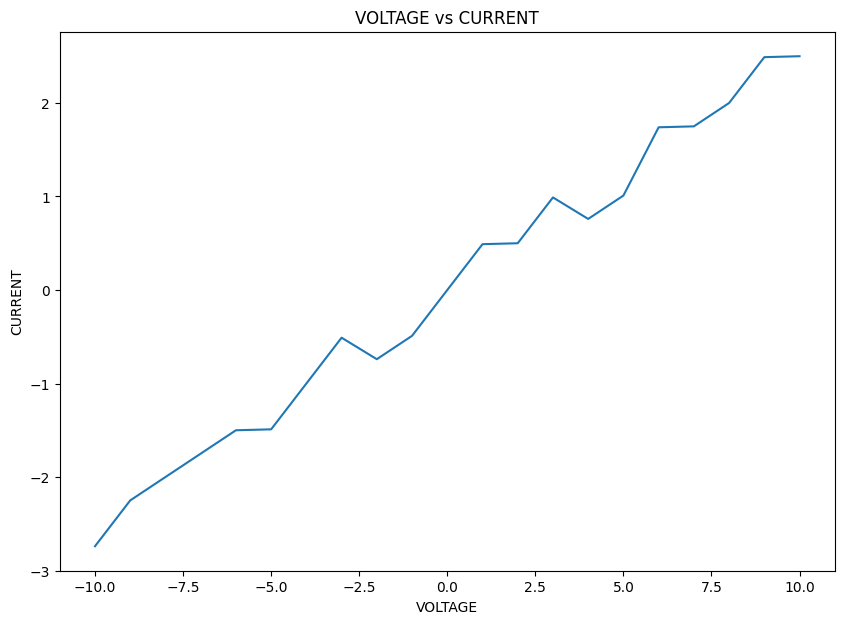

In [6]:
# line plot the VOLTAGE and CURRENT using matplot lib
plt.plot(expDataframe.VOLTAGE,expDataframe.CURRENT)
plt.title("VOLTAGE vs CURRENT")
plt.xlabel("VOLTAGE")
plt.ylabel("CURRENT")

Text(0, 0.5, 'CURRENT')

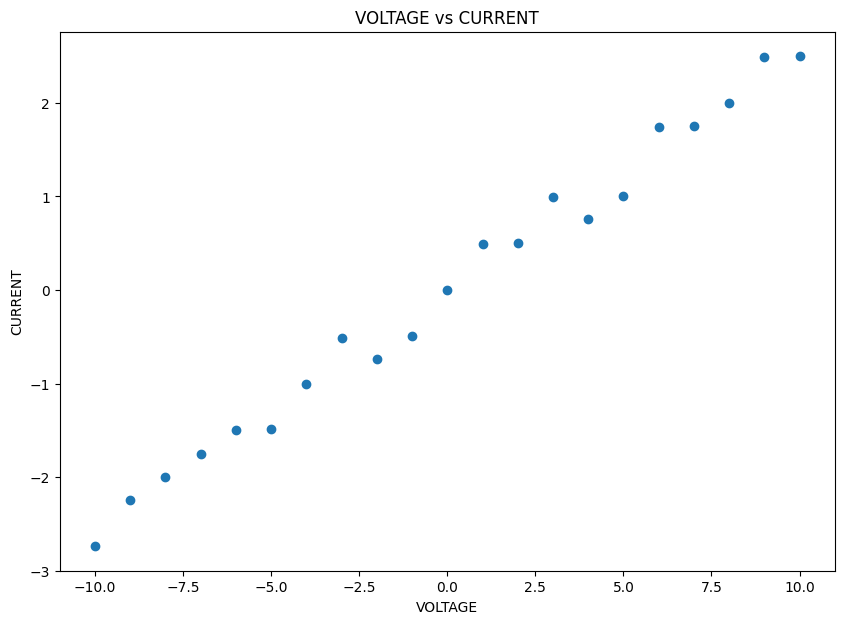

In [7]:
# scatterplot using matplotlib
plt.scatter(expDataframe.VOLTAGE,expDataframe.CURRENT)
plt.title("VOLTAGE vs CURRENT")
plt.xlabel("VOLTAGE")
plt.ylabel("CURRENT")

<Axes: xlabel='VOLTAGE', ylabel='CURRENT'>

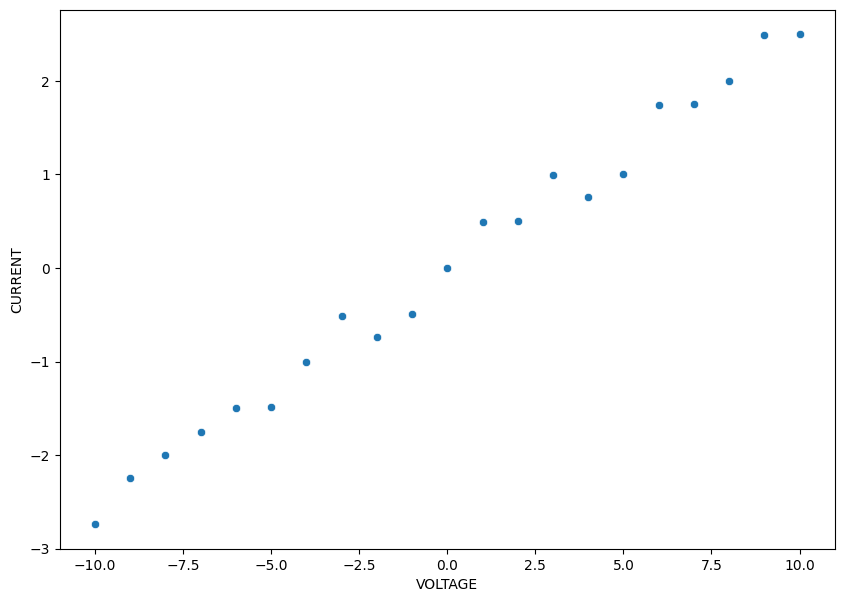

In [8]:
# scatterplot using seaborn
sns.scatterplot(x="VOLTAGE",y="CURRENT",data=expDataframe)

In [9]:
# Create X
X = expDataframe.VOLTAGE.to_numpy().reshape(-1,1)
print(X)

[[-10.]
 [ -9.]
 [ -8.]
 [ -7.]
 [ -6.]
 [ -5.]
 [ -4.]
 [ -3.]
 [ -2.]
 [ -1.]
 [  0.]
 [  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]]


In [10]:
# create y
y = expDataframe.CURRENT.to_numpy()
print(y)

[-2.74 -2.25 -2.   -1.75 -1.5  -1.49 -1.   -0.51 -0.74 -0.49  0.    0.49
  0.5   0.99  0.76  1.01  1.74  1.75  2.    2.49  2.5 ]


In [11]:
# Test Train Split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size=0.2,random_state=10)

In [12]:
# use sklearn's linear regression to learn from the data
lr = LinearRegression()
lr.fit(X,y)
print("Parameters after learning from training data")
print("  m =",lr.coef_[0])
print("  c =",lr.intercept_)

Parameters after learning from training data
  m = 0.2577922077922077
  c = -0.011428571428571439


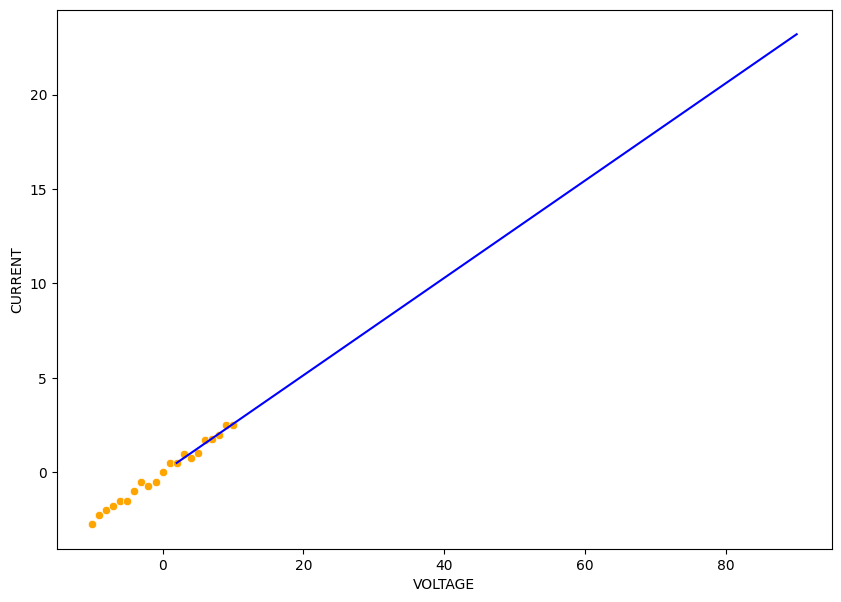

In [13]:
sns.scatterplot(x="VOLTAGE", y="CURRENT",data=expDataframe, color="orange")
plt.plot([2,90], np.array([[1 ,2],[1,90]]) @ [lr.intercept_, lr.coef_[0]], color="blue")

In [14]:
# use sklearn's linear regression to learn from the data
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X,y)
print("Parameters after learning from training data")
print("  m =",lr2.coef_[0])
print("  c =",lr2.intercept_)
print("  R =",1/lr2.coef_[0])

Parameters after learning from training data
  m = 0.25779220779220774
  c = 0.0
  R = 3.879093198992444


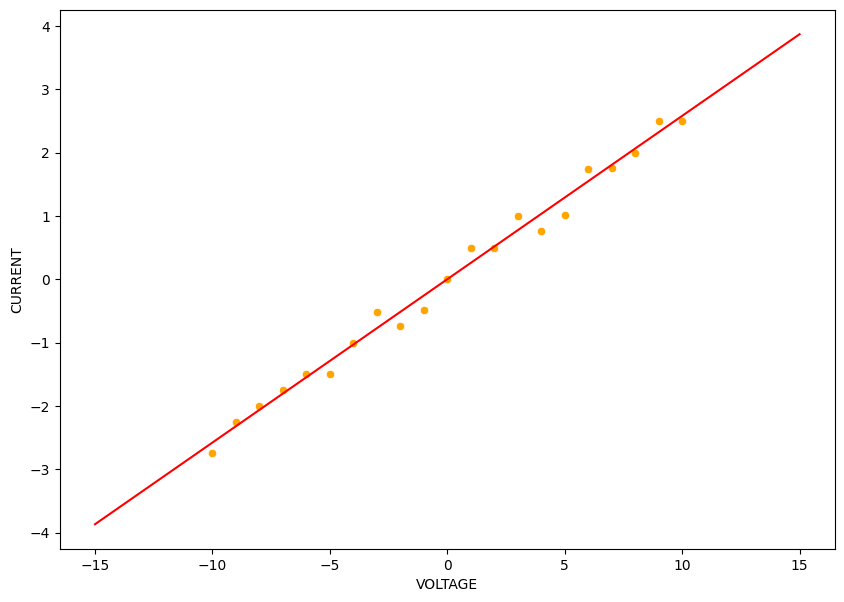

In [15]:
sns.scatterplot(x="VOLTAGE", y="CURRENT",data=expDataframe, color="orange")
xx=[-15,15]
yy=np.array([[1 ,xx[0]],[1,xx[1]]]) @ [lr2.intercept_, lr2.coef_[0]]
plt.plot(xx, yy, color="red")

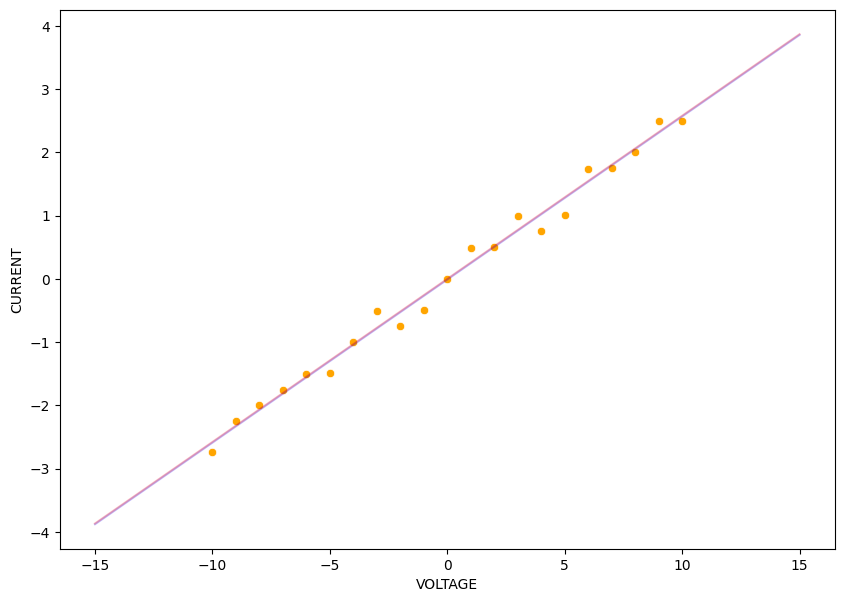

In [16]:
# Compare lr and lr2
sns.scatterplot(x="VOLTAGE", y="CURRENT",data=expDataframe, color="orange")
plt.plot([-15,15], np.array([[1 ,-15],[1,15]]) @ [lr.intercept_, lr.coef_[0]], color="blue", alpha=0.25)
plt.plot([-15,15], np.array([[1 ,-15],[1,15]]) @ [lr2.intercept_, lr2.coef_[0]], color="red",alpha=0.25)
